In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [171]:
data=pd.read_csv('wine.csv')

In [172]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<Axes: ylabel='Frequency'>

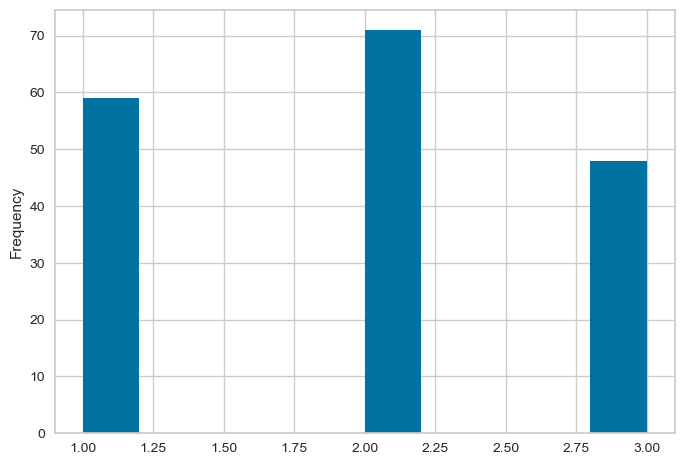

In [173]:
data['Type'].plot(kind='hist')

In [174]:
data.Type.value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

In [175]:
#well lets drop this already made clusters 
data.drop('Type',axis=1,inplace=True)

In [176]:
len(data.columns)

13

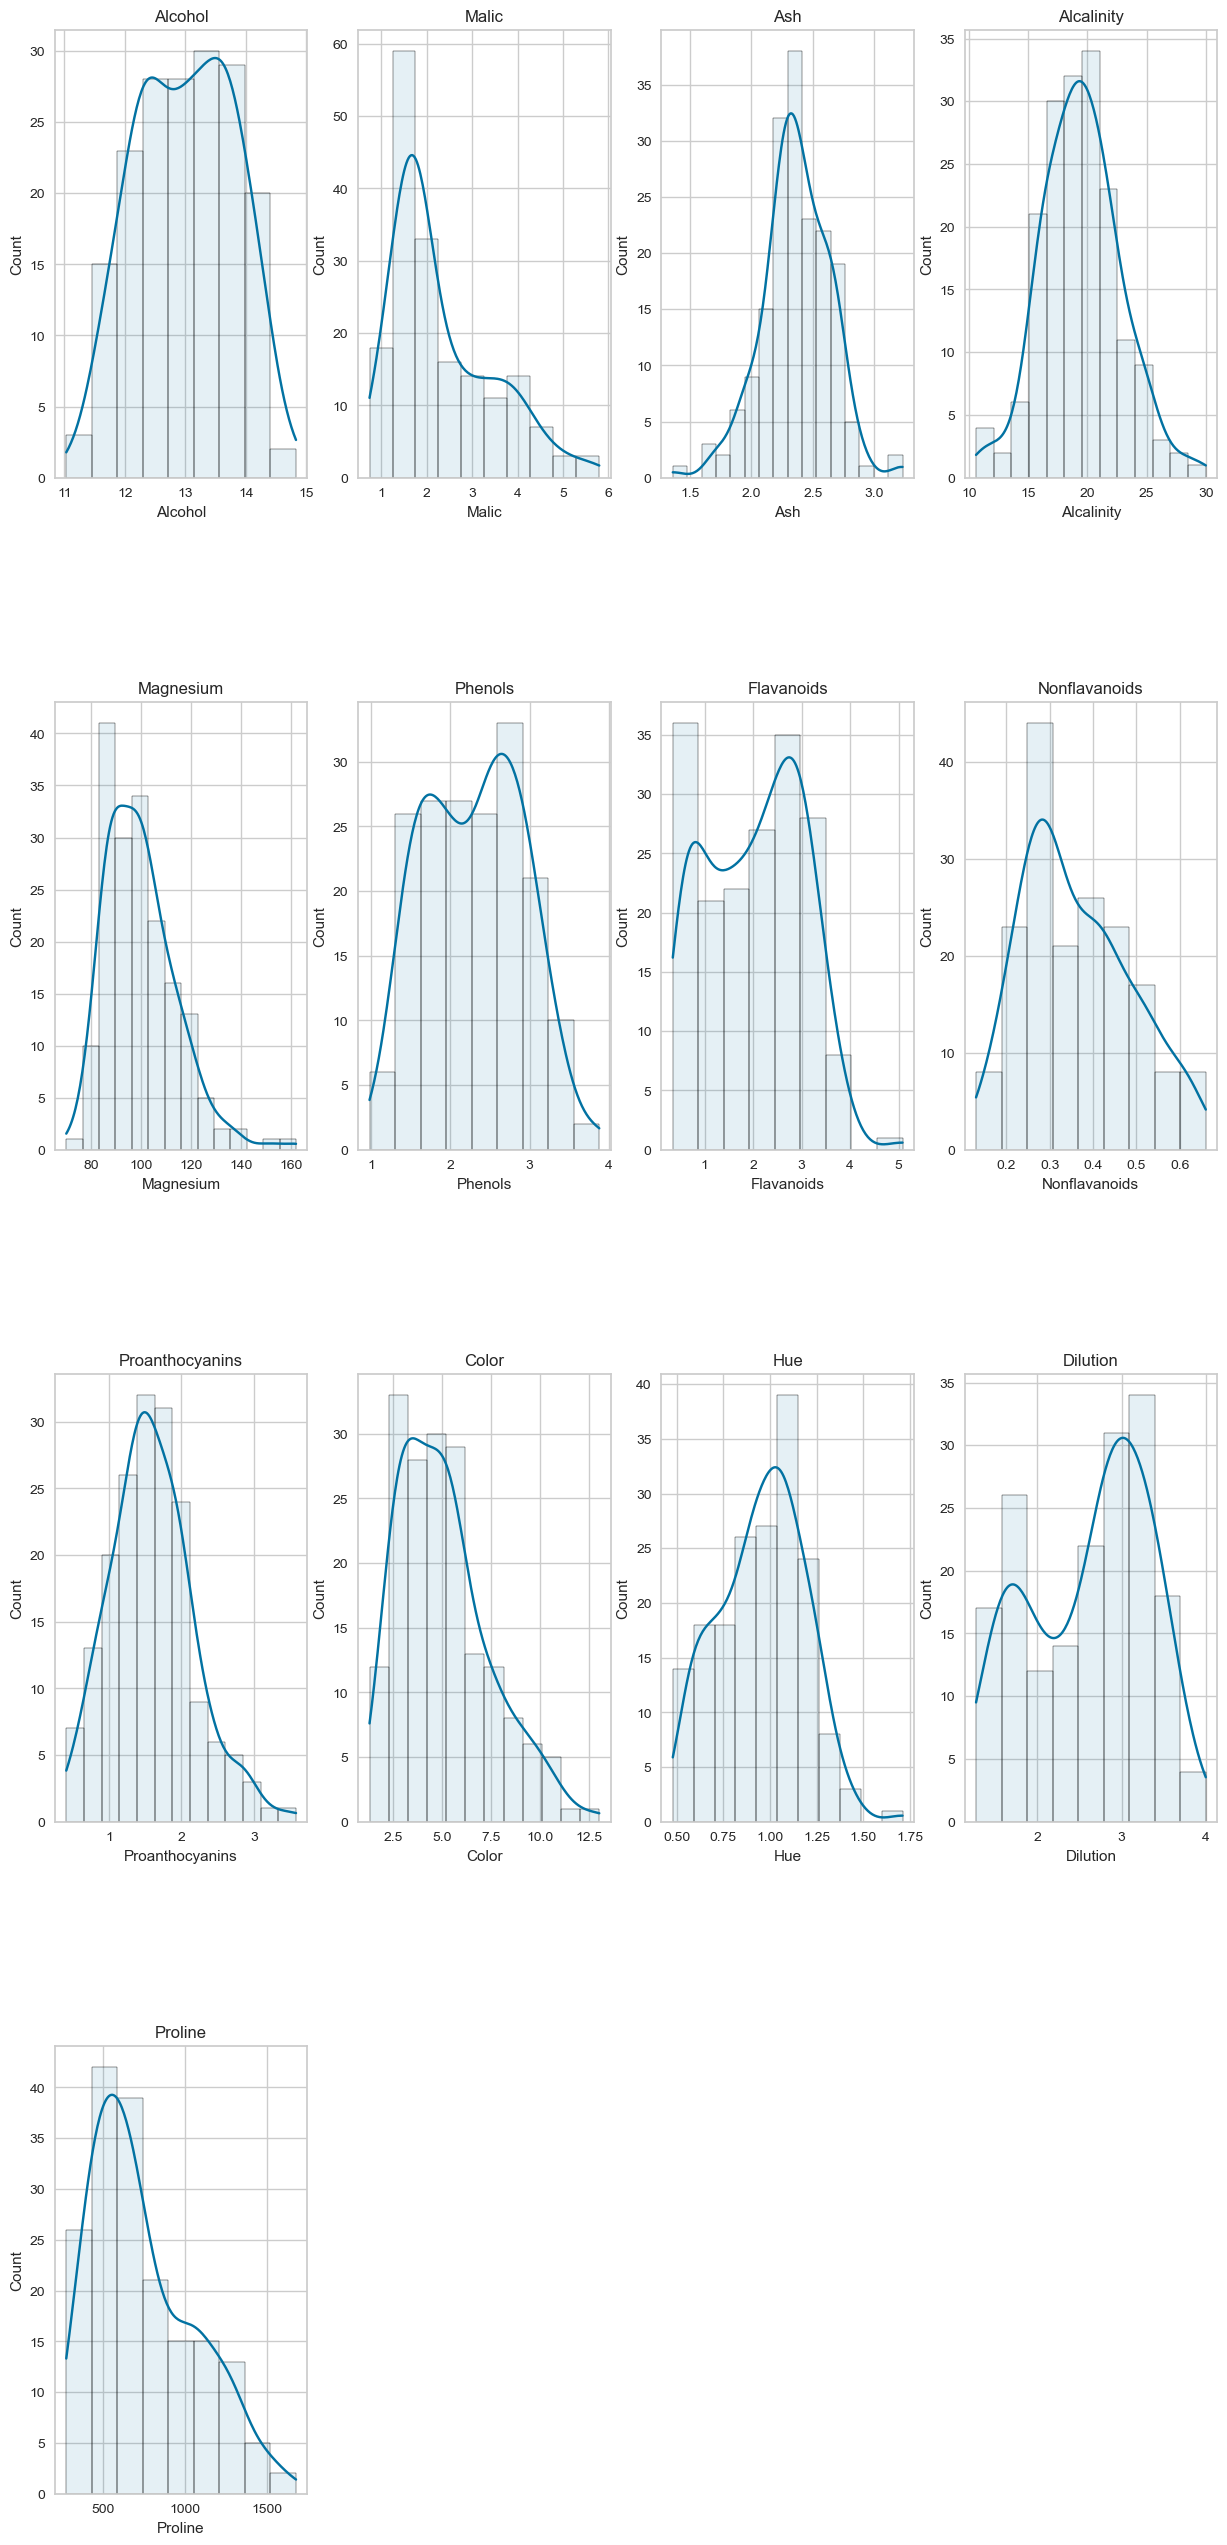

In [177]:

num_rows = (len(data.columns) - 1) // 4 + 1

fig, axes = plt.subplots(num_rows, 4, figsize=(15, 8 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, v in enumerate(data.columns):
    ax = axes[i // 4, i % 4] 
    sns.histplot(data[v], kde=True, alpha=0.1, ax=ax)
    ax.set_title(v)

# Remove any empty subplots in the last row
for i in range(len(data.columns), num_rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.show()


In [178]:
from sklearn.preprocessing import PowerTransformer
transform=PowerTransformer()
data_transformed=transform.fit_transform(data)

In [179]:
data_transformed=pd.DataFrame(data_transformed,columns=data.columns)

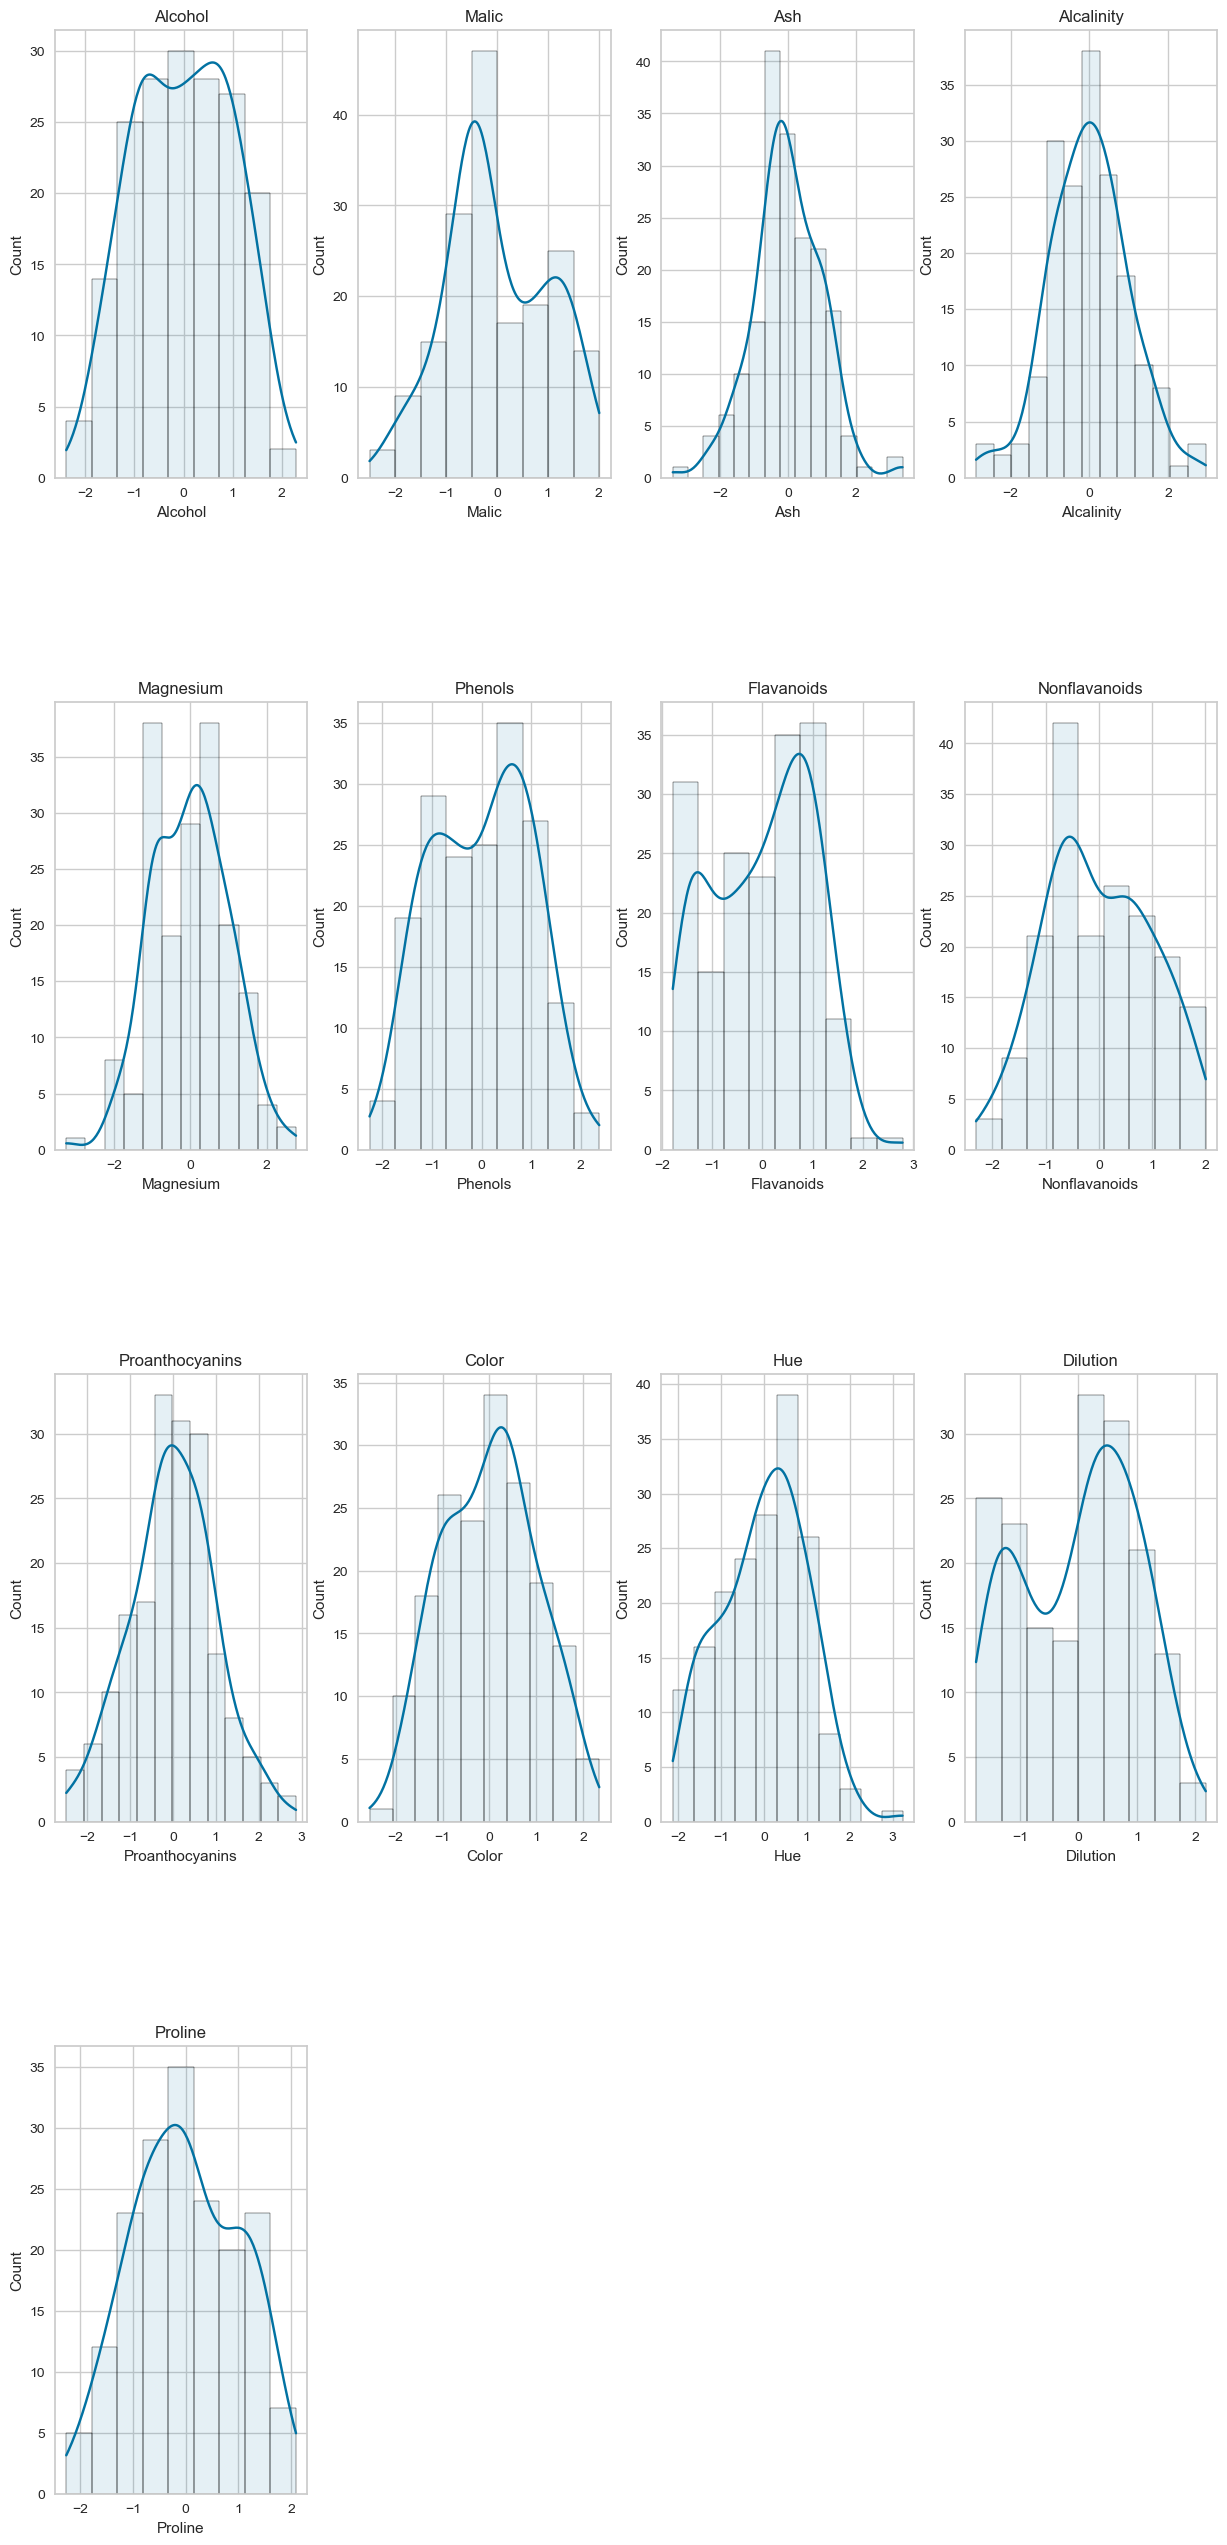

In [180]:
#After Transformation
num_rows = (len(data.columns) - 1) // 4 + 1

fig, axes = plt.subplots(num_rows, 4, figsize=(15, 8 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i, v in enumerate(data.columns):
    ax = axes[i // 4, i % 4] 
    sns.histplot(data_transformed[v], kde=True, alpha=0.1, ax=ax)
    ax.set_title(v)

# Remove any empty subplots in the last row
for i in range(len(data.columns), num_rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.show()


In [181]:
#much more normal, now lets scale it

In [182]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data_scaled=scale.fit_transform(data_transformed)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)

In [183]:
data_scaled

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.530388,-0.435463,0.210464,-1.180400,1.690749,0.819950,1.027153,-0.609851,1.202701,0.451450,0.368811,2.037232,1.062541
1,0.238381,-0.338701,-0.839064,-2.663167,0.188126,0.591646,0.747647,-0.806373,-0.490487,-0.110974,0.412391,1.150327,1.029743
2,0.188751,0.318077,1.119290,-0.243437,0.261461,0.819950,1.192395,-0.421141,1.925646,0.467301,0.325202,0.779080,1.307868
3,1.708049,-0.121469,0.471827,-0.799464,1.020463,2.331036,1.419054,-1.011162,1.038972,1.182895,-0.420745,1.232761,1.810007
4,0.288052,0.523699,1.903702,0.472612,1.282104,0.819950,0.681647,0.342097,0.471707,-0.141340,0.368811,0.405810,0.188985
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.874761,1.971560,0.284824,0.325633,-0.206899,-0.983143,-1.469686,1.242295,-0.931816,1.153680,-1.400065,-1.221001,0.205257
174,0.487148,1.353424,0.396838,1.049949,0.333054,-0.777669,-1.308946,0.641775,-0.244461,1.032950,-1.131304,-1.432767,0.237441
175,0.325332,1.516324,-0.411341,0.177532,1.379377,-1.139573,-1.377430,0.641775,-0.356749,1.790358,-1.625052,-1.432767,0.493246
176,0.201155,0.523699,-0.011100,0.177532,1.379377,-1.035059,-1.388902,1.303401,-0.152471,1.581288,-1.579979,-1.363232,0.507388


### Now lets try to use PCA for dimension Reduction

In [184]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

In [185]:
distort={}
for k in range(2,12):
    kmean=KMeans(n_clusters=k,n_init=10)
    kmean.fit(data2)
    distort[k]=kmean.inertia_


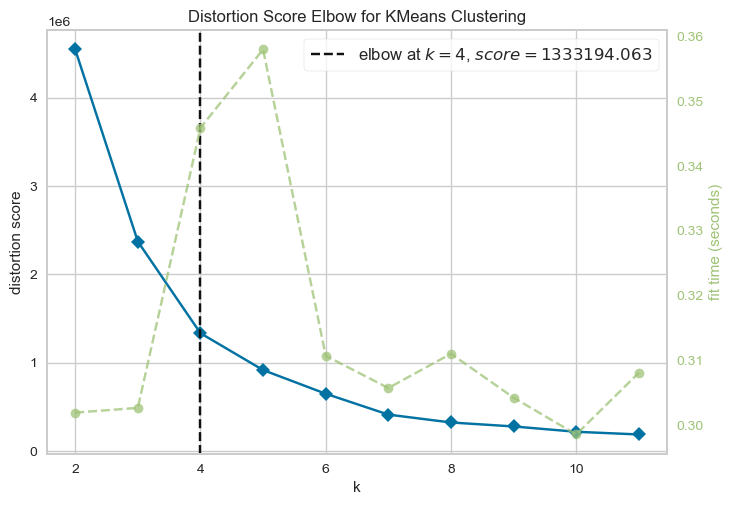

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [186]:

# Instantiate the clustering model and visualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(data2)# Fit the data to the visualizer
visualizer.show()      

In [187]:
distort #according to the visualization above the best score value of k would be 4 lets try it out with silouhite scores

{2: 4543801.220149009,
 3: 2370742.3045900567,
 4: 1331953.8216337343,
 5: 916424.194313911,
 6: 647371.0045564491,
 7: 412180.52579616115,
 8: 324406.19242245686,
 9: 273199.48396150296,
 10: 217981.3200204027,
 11: 185841.41209107472}

In [188]:
pca=PCA(n_components=3)
data2=pca.fit_transform(data_scaled)

In [189]:
# data2 is where we draw clusters
data2=pd.DataFrame(data2,columns=pca.get_feature_names_out())

In [190]:
#Clusters using Kmeans
from sklearn.cluster import KMeans
kmean=KMeans(n_clusters=3,random_state=42)
data['PCA_KMeans']=kmean.fit_predict(data2)

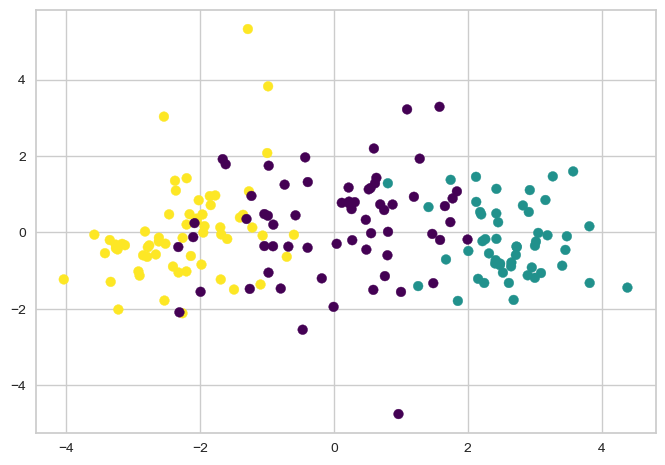

In [191]:
plt.scatter(data2.pca0,data2.pca2,c=data.PCA_KMeans,cmap='viridis')

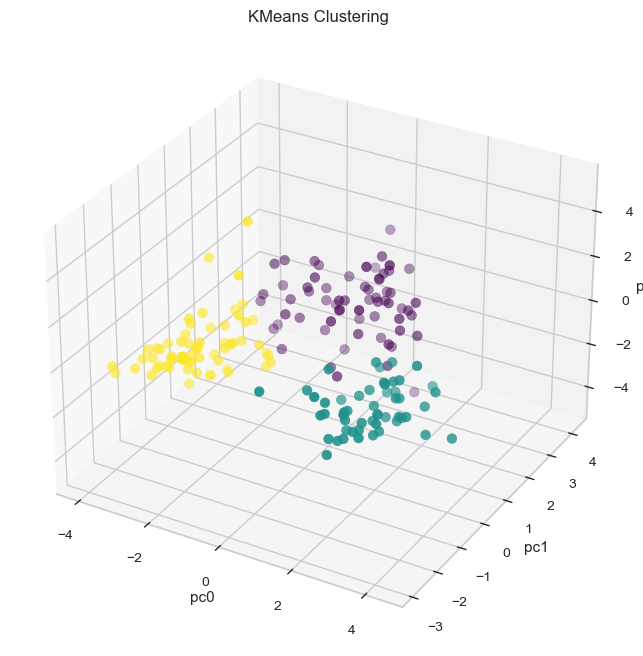

In [192]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data2['pca0'], data2['pca1'], data2['pca2'], c=data['PCA_KMeans'], cmap='viridis', s=50)
ax.set_title('KMeans Clustering')
ax.set_xlabel('pc0')
ax.set_ylabel('pc1')
ax.set_zlabel('pc2')
plt.show()

In [193]:
data['PCA_KMeans'].value_counts()

PCA_KMeans
0    64
2    62
1    52
Name: count, dtype: int64

In [194]:
from sklearn.metrics import silhouette_score

# Calculate Silhoutte Score
score = silhouette_score(data2, kmean.labels_, metric='euclidean')
# Print the score
print(f'Silhouetter Average Score: %.3f'%score )

Silhouetter Average Score: 0.470


In [195]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
#fit the model and predict the clusters
y_pred = model.fit_predict(data2)

In [196]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

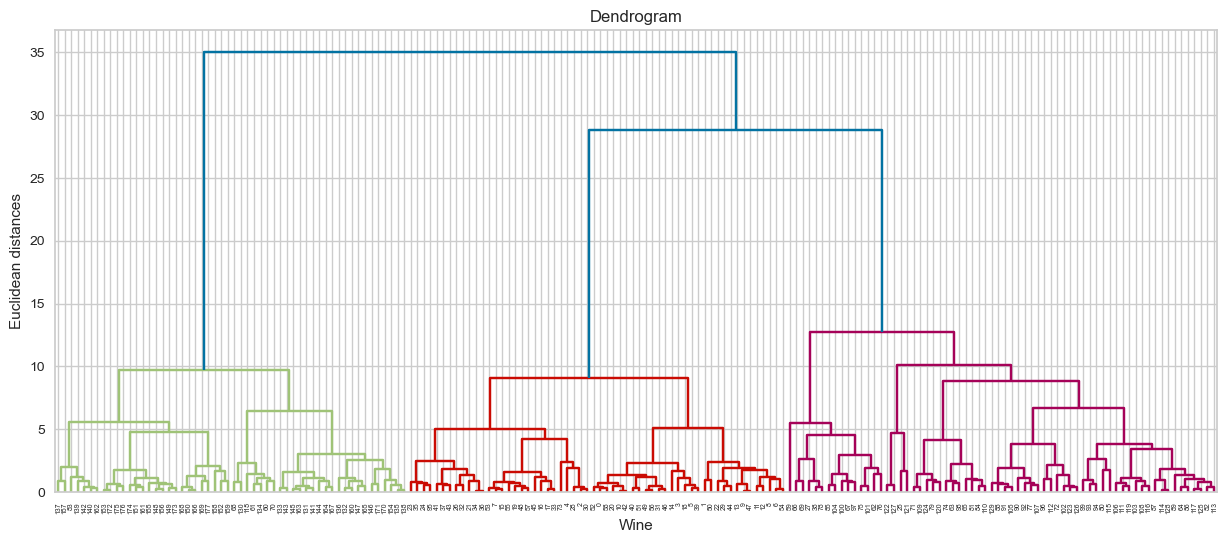

In [197]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean distances')
#create linkage matrix
link_matrix = linkage(data2,method='ward')
dendrogram = dendrogram(link_matrix)

In [198]:
# we can divide this on the basis of 3 or 4 clusters 

In [199]:
# for n_clusters=4
# Calculate Silhoutte Score
score = silhouette_score(data2, y_pred, metric='euclidean')
# Print the score
print(f'Silhouetter Average Score: %.3f'%score )

Silhouetter Average Score: 0.460


In [200]:
#for n clusters=3
# Calculate Silhoutte Score
score = silhouette_score(data2, y_pred, metric='euclidean')
# Print the score
print(f'Silhouetter Average Score: %.3f'%score )

Silhouetter Average Score: 0.460


## We are getting the best value of silhoutte score with n_clusters =3 for both Kmeans and heirarchical We can use more Statistical methods and probably learn more by some domain knowledge about Wines but i will leave it at this

In [201]:
data['PCA_Agglo']=y_pred

In [202]:
data[~data['PCA_Agglo']==data['PCA_KMeans']] #They both are basically the same

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,PCA_KMeans,PCA_Agglo


In [203]:
data2=pd.read_csv('wine.csv')

In [204]:
data2.Type.value_counts()#3 clusters

Type
2    71
1    59
3    48
Name: count, dtype: int64